## Importing Libraries

In [8]:
import io

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)
# Make sure you are running this in Python3 environment and TFv2.x

2.2.0


## Loading Data

In [2]:
dataset, info = tfds.load(
    'imdb_reviews/subwords8k', 
    with_info=True,
    as_supervised=True
)
train_dataset, test_dataset = dataset['train'], dataset['test']

## Tokenizing and Embedding

In [3]:
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


## Building a Model

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


## Fitting

In [6]:
NUM_EPOCHS = 10
history = model.fit(
    train_dataset,
    epochs=NUM_EPOCHS,
    validation_data=test_dataset
)

Epoch 1/10
391/391 [==============================] - 176s 450ms/step - loss: 0.4509 - accuracy: 0.7715 - val_loss: 0.3073 - val_accuracy: 0.8777
Epoch 2/10
391/391 [==============================] - 165s 422ms/step - loss: 0.2236 - accuracy: 0.9146 - val_loss: 0.3041 - val_accuracy: 0.8796
Epoch 3/10
391/391 [==============================] - 164s 418ms/step - loss: 0.1696 - accuracy: 0.9396 - val_loss: 0.3357 - val_accuracy: 0.8729
Epoch 4/10
391/391 [==============================] - 157s 400ms/step - loss: 0.1389 - accuracy: 0.9513 - val_loss: 0.3653 - val_accuracy: 0.8701
Epoch 5/10
391/391 [==============================] - 159s 407ms/step - loss: 0.1108 - accuracy: 0.9631 - val_loss: 0.4387 - val_accuracy: 0.8620
Epoch 6/10
391/391 [==============================] - 165s 422ms/step - loss: 0.0873 - accuracy: 0.9708 - val_loss: 0.5203 - val_accuracy: 0.8601
Epoch 7/10
391/391 [==============================] - 171s 438ms/step - loss: 0.0696 - accuracy: 0.9778 - val_loss: 0.5534 -

## Visualising Accuracy and Loss

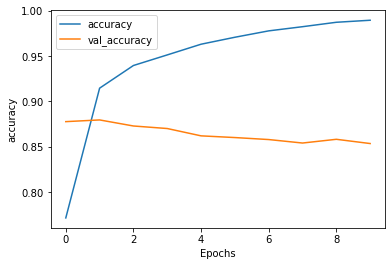

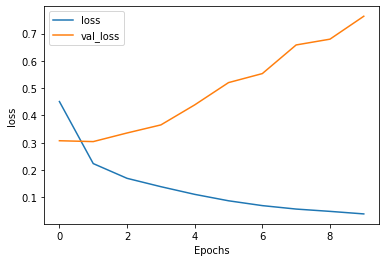

In [9]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, 'accuracy')

plot_graphs(history, 'loss')